# 📊 Análisis ICT: Influencia del Rango Asiático en la Operatividad


> ⚠️ **Nota metodológica**  
> Este análisis se realiza a partir de un **backtesting personal**, basado en observaciones manuales tomadas a lo largo del tiempo. Los datos fueron recolectados y volcados manualmente en una hoja de Excel, sin el uso de scrapers ni backtesting automatizado.  
>  
> Por lo tanto, los resultados reflejan un enfoque práctico y artesanal, propio de una rutina operativa real, y pueden estar sujetos a sesgos humanos en la toma de datos o interpretación de las condiciones del mercado.

🔗 Este análisis está dividido en dos secciones:

1️⃣ **Primera Parte – Análisis General Rango vs Promedio**  
2️⃣ **Segunda Parte – Análisis Detallado por Activo (EUR/USD y NQ1!)**


<a id="primera-parte--análisis-general-rango-vs-promedio"></a>
## 1️⃣ Primera Parte – Análisis General Rango vs Promedio

Este primer bloque analiza si el rango de la sesión asiática, en relación al promedio de los últimos 5 días, tiene influencia en el resultado de la operación (Ganada, Perdida, No dio entrada).

### 🔹 Análisis realizado
- Gráfico de distribucón de resultados
- Visualización del porcentaje de Ganadas, Perdidas y No Entrada por tipo de Rango
- Tabla cruzada Rango vs AVG
- Mapa de calor Activo + Rango vs Resultado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configuración visual
sns.set(style="whitegrid")

In [3]:
df_raw = pd.read_csv("data/asia.csv", sep=";", encoding='latin-1')

In [4]:
df_raw.head()

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,NaN,NaN,No da entrada porque no hay cambio de estructu...,NaN,1.0
1,3/1/2025,NQ1!,Perdida,"1,85/1",1m,03:20,54,"71,8125",Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0
2,3/1/2025,EURUSD,Ganada,3/1,1m,00:23,"0,00082","0,001252","Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0
3,6/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,"41,5","65,75","No llega a meterse nuevamente en el rango, dur...",NaN,4.0
4,6/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00171","0,001192","No llega a meterse nuevamente en el rango, dur...",NaN,5.0


In [5]:
df_raw.tail()

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_raw

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,NaN,NaN,No da entrada porque no hay cambio de estructu...,NaN,1.0
1,3/1/2025,NQ1!,Perdida,"1,85/1",1m,03:20,54,"71,8125",Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0
2,3/1/2025,EURUSD,Ganada,3/1,1m,00:23,"0,00082","0,001252","Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0
3,6/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,"41,5","65,75","No llega a meterse nuevamente en el rango, dur...",NaN,4.0
4,6/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00171","0,001192","No llega a meterse nuevamente en el rango, dur...",NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Eliminar filas donde TODAS las columnas están vacías (NaN)
df_raw.dropna(how='all', inplace=True)

In [8]:
print(df_raw.shape)

(87, 11)


In [9]:
df_raw

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,NaN,NaN,No da entrada porque no hay cambio de estructu...,NaN,1.0
1,3/1/2025,NQ1!,Perdida,"1,85/1",1m,03:20,54,"71,8125",Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0
2,3/1/2025,EURUSD,Ganada,3/1,1m,00:23,"0,00082","0,001252","Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0
3,6/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,"41,5","65,75","No llega a meterse nuevamente en el rango, dur...",NaN,4.0
4,6/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00171","0,001192","No llega a meterse nuevamente en el rango, dur...",NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
82,24/3/2025,EURUSD,Ganada,2/1,5m,00:55,NaN,NaN,NaN,NaN,32.0
83,25/3/2025,NQ1!,No dio entrada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0
84,25/3/2025,EURUSD,No dio entrada,NaN,NaN,NaN,"0,00144",NaN,NaN,NaN,34.0
85,26/3/2025,NQ1!,Perdida,2/1,5m,02:50,"67,5","60,75",NaN,NaN,35.0


In [10]:
df = df_raw.copy()  # Duplicamos el original

In [11]:
df

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,NaN,NaN,No da entrada porque no hay cambio de estructu...,NaN,1.0
1,3/1/2025,NQ1!,Perdida,"1,85/1",1m,03:20,54,"71,8125",Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0
2,3/1/2025,EURUSD,Ganada,3/1,1m,00:23,"0,00082","0,001252","Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0
3,6/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,"41,5","65,75","No llega a meterse nuevamente en el rango, dur...",NaN,4.0
4,6/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00171","0,001192","No llega a meterse nuevamente en el rango, dur...",NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
82,24/3/2025,EURUSD,Ganada,2/1,5m,00:55,NaN,NaN,NaN,NaN,32.0
83,25/3/2025,NQ1!,No dio entrada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0
84,25/3/2025,EURUSD,No dio entrada,NaN,NaN,NaN,"0,00144",NaN,NaN,NaN,34.0
85,26/3/2025,NQ1!,Perdida,2/1,5m,02:50,"67,5","60,75",NaN,NaN,35.0


In [12]:
df.isnull().sum()

fecha                       0
activo                      0
Resultado                   2
Ratio                      37
Temporalidad               15
Hora de entrada            41
Rango                       9
AVG                        18
detalle de la operacion    36
mejoras                    54
Foto                        0
dtype: int64

In [13]:
df.replace(r'(?i)^none$', np.nan, regex=True, inplace=True)
df.replace("", np.nan, inplace=True)

In [14]:
df

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,NaN,NaN,No da entrada porque no hay cambio de estructu...,NaN,1.0
1,3/1/2025,NQ1!,Perdida,"1,85/1",1m,03:20,54,"71,8125",Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0
2,3/1/2025,EURUSD,Ganada,3/1,1m,00:23,"0,00082","0,001252","Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0
3,6/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,"41,5","65,75","No llega a meterse nuevamente en el rango, dur...",NaN,4.0
4,6/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00171","0,001192","No llega a meterse nuevamente en el rango, dur...",NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
82,24/3/2025,EURUSD,Ganada,2/1,5m,00:55,NaN,NaN,NaN,NaN,32.0
83,25/3/2025,NQ1!,No dio entrada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0
84,25/3/2025,EURUSD,No dio entrada,NaN,NaN,NaN,"0,00144",NaN,NaN,NaN,34.0
85,26/3/2025,NQ1!,Perdida,2/1,5m,02:50,"67,5","60,75",NaN,NaN,35.0


In [15]:
df.isnull().sum()

fecha                       0
activo                      0
Resultado                   2
Ratio                      43
Temporalidad               17
Hora de entrada            41
Rango                      10
AVG                        20
detalle de la operacion    36
mejoras                    54
Foto                        0
dtype: int64

In [16]:
# Filtrar filas donde Resultado es NaN
df[df["Resultado"].isna()]

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
29,24/1/2025,NQ1!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
49,28/2/2025,NQ1!,NaN,NaN,NaN,NaN,"152,25","89,45",NaN,"No da entrada por el horario, despues de la 4 ...",19.0


In [17]:
df.drop(index=29, inplace=True)

In [18]:
df[df["Resultado"].isna()]

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
49,28/2/2025,NQ1!,NaN,NaN,NaN,NaN,"152,25","89,45",NaN,"No da entrada por el horario, despues de la 4 ...",19.0


In [19]:
df["Resultado"] = df["Resultado"].fillna("No dio entrada")

In [20]:
df.loc[49, "Resultado"] = "No dio entrada"


In [21]:
df.isnull().sum()

fecha                       0
activo                      0
Resultado                   0
Ratio                      42
Temporalidad               16
Hora de entrada            40
Rango                       9
AVG                        19
detalle de la operacion    35
mejoras                    53
Foto                        0
dtype: int64

In [22]:
# Filtrar filas donde AVG es NaN
df[df["AVG"].isna()]

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,NaN,NaN,No da entrada porque no hay cambio de estructu...,NaN,1.0
9,9/1/2025,NQ1!,Perdida,"1,7 /1",5m,03:40,NaN,NaN,"Se sigue entrada PO3, el precio se va a SL.","Analizar la cantidad de puntos, en esta operac...",10.0
13,14/1/2025,NQ1!,Perdida,"1,85/1",5m,01:35,NaN,NaN,NaN,"Para estudiar y mejorar las entradas, esta no ...",14.0
24,21/1/2025,EURUSD,Ganada,NaN,5m,05:35,NaN,NaN,Entrada PO3,Dio entrada fuera del horario operativo de Lon...,25.0
28,23/1/2025,EURUSD,Ganada,"1,2/1",5m,02:50,"0,00191",NaN,Entrada PO3 sin observaciones,NaN,29.0
51,2/3/2025,NQ1!,No dio entrada,NaN,5m,NaN,"97,75",NaN,El precio rompe el rango superior y se va muy ...,NaN,1.0
52,2/3/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00161",NaN,En este caso el precio tiene un GAP al alza y ...,Estudia bien los rangos anteriores para el PO3.,2.0
53,3/3/2025,NQ1!,Ganada,NaN,5m,01:30,"103,95",NaN,El precio rompe la parte superior con una vela...,En este caso no tengo un cambio de tendencia m...,3.0
54,3/3/2025,EURUSD,No dio entrada,NaN,5m,NaN,NaN,NaN,Al ampliar el rango a la zona anterior el prec...,Este ejemplo es bueno de ver ya que el aguarda...,4.0
67,13/3/2025,NQ1!,No dio entrada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0


In [23]:
# Elimino los dos NaN de AVG, ya que no me aportan al analisis
df.drop([0, 9, 13, 24, 28, 51, 52, 53, 54, 67, 68, 71, 72, 78, 79, 81, 82, 83, 84], inplace=True)
df.reset_index(drop=True, inplace=True)

In [24]:
df.isnull().sum()

fecha                       0
activo                      0
Resultado                   0
Ratio                      31
Temporalidad               11
Hora de entrada            30
Rango                       0
AVG                         0
detalle de la operacion    26
mejoras                    40
Foto                        0
dtype: int64

In [25]:
# Limpiamos los numeros antes de convertir
df["Rango"] = df["Rango"].astype(str).str.replace(",", ".").str.strip()
df["AVG"] = df["AVG"].astype(str).str.replace(",", ".").str.strip()

# Ahora sí convertimos a número (float)
df["Rango"] = pd.to_numeric(df["Rango"], errors="coerce")
df["AVG"] = pd.to_numeric(df["AVG"], errors="coerce")

# Convertir fechas
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

In [26]:
df

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2025-03-01,NQ1!,Perdida,"1,85/1",1m,03:20,54.00000,71.812500,Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0
1,2025-03-01,EURUSD,Ganada,3/1,1m,00:23,0.00082,0.001252,"Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0
2,2025-06-01,NQ1!,No dio entrada,NaN,5m,NaN,41.50000,65.750000,"No llega a meterse nuevamente en el rango, dur...",NaN,4.0
3,2025-06-01,EURUSD,No dio entrada,NaN,5m,NaN,0.00171,0.001192,"No llega a meterse nuevamente en el rango, dur...",NaN,5.0
4,2025-07-01,NQ1!,Ganada,"1,66/1",5m,02:05,69.75000,72.000000,"Se forma un rango a la baja, el precio rompe c...",NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...
62,NaT,EURUSD,Perdida,2/1,5m,01:00,0.00132,0.001660,NaN,NaN,26.0
63,NaT,NQ1!,No dio entrada,NaN,NaN,NaN,68.25000,81.450000,NaN,NaN,27.0
64,NaT,EURUSD,No dio entrada,NaN,NaN,NaN,0.00254,0.001664,NaN,NaN,30.0
65,NaT,NQ1!,Perdida,2/1,5m,02:50,67.50000,60.750000,NaN,NaN,35.0


In [27]:
df["Rango vs Avg"] = df.apply(
    lambda row: "Mayor" if row["Rango"] > row["AVG"]
    else "Menor" if row["Rango"] < row["AVG"]
    else "Igual",
    axis=1
)

In [28]:
df.head()

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto,Rango vs Avg
0,2025-03-01,NQ1!,Perdida,"1,85/1",1m,03:20,54.00000,71.812500,Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0,Menor
1,2025-03-01,EURUSD,Ganada,3/1,1m,00:23,0.00082,0.001252,"Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0,Menor
2,2025-06-01,NQ1!,No dio entrada,NaN,5m,NaN,41.50000,65.750000,"No llega a meterse nuevamente en el rango, dur...",NaN,4.0,Menor
3,2025-06-01,EURUSD,No dio entrada,NaN,5m,NaN,0.00171,0.001192,"No llega a meterse nuevamente en el rango, dur...",NaN,5.0,Mayor
4,2025-07-01,NQ1!,Ganada,"1,66/1",5m,02:05,69.75000,72.000000,"Se forma un rango a la baja, el precio rompe c...",NaN,6.0,Menor


In [29]:
# Contamos los valores
df["Resultado"].value_counts()

Resultado
No dio entrada    30
Ganada            26
Perdida           11
Name: count, dtype: int64

In [30]:
df["Resultado"] = pd.Categorical(
    df["Resultado"],
    categories=["Ganada", "Perdida", "No dio entrada"],
    ordered=True
)

In [31]:
# Creamos una tabla de doble entrada (tipo tabla dinámica) que cruza:
# - Las categorías de "Comparacion_Rango_vs_Avg" (Mayor, Menor, Igual)
# - Con los valores de "Resultado" (Ganada, Perdida, No dio entrada)

pd.crosstab(df["Rango vs Avg"], df["Resultado"])

Resultado,Ganada,Perdida,No dio entrada
Rango vs Avg,,,
Mayor,6,5,20
Menor,20,6,10


In [32]:
# Como porcentajes

(pd.crosstab(df["Rango vs Avg"], df["Resultado"], normalize='index') * 100).round(0).astype(int).style.format("{:.0f}%")

Resultado,Ganada,Perdida,No dio entrada
Rango vs Avg,,,
Mayor,19%,16%,65%
Menor,56%,17%,28%


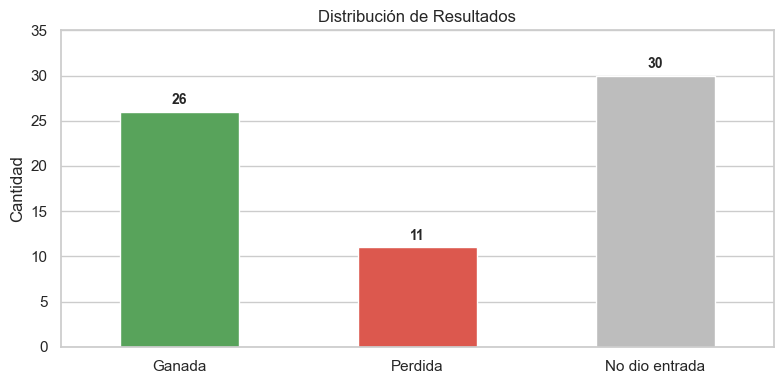

In [33]:
# Gráfico de distribución de resultados
# Colores personalizados
colores = {
    "Ganada": "#4CAF50",         # Verde
    "Perdida": "#F44336",        # Rojo
    "No dio entrada": "#BDBDBD"  # Gris
}

# Lista de colores en el orden de las categorías
colores_lista = [colores["Ganada"], colores["Perdida"], colores["No dio entrada"]]

# Gráfico
plt.figure(figsize=(8, 4))
ax = sns.countplot(
    data=df,
    x="Resultado",
    order=["Ganada", "Perdida", "No dio entrada"],
    width=0.5,
    hue="Resultado",
    dodge=False,
    palette=colores_lista  # Usamos la lista de colores en orden
)

y_ticks = [round(tick) for tick in ax.get_yticks()]
ax.set_yticks(y_ticks)

# Agregar etiquetas con los valores exactos arriba de cada barra
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,  # posición ligeramente arriba de la barra
            f"{int(height)}",  # sin decimales
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold"
        )

plt.title("Distribución de Resultados")
plt.xlabel("")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

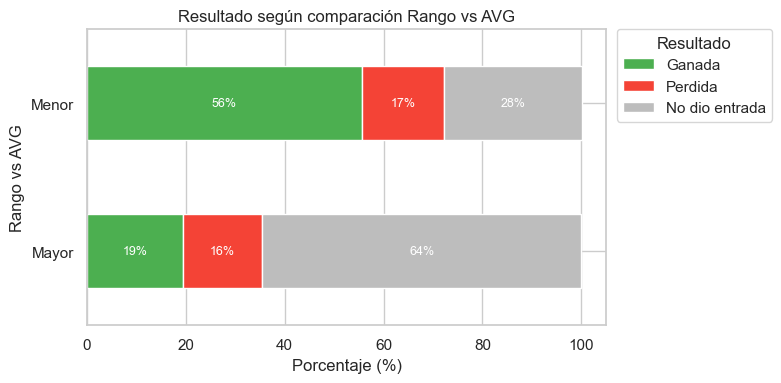

In [34]:
# Tabla de porcentaje por fila (comparación)
tabla = (pd.crosstab(df["Rango vs Avg"], df["Resultado"], normalize="index") * 100).round(1)

# Asegurar orden de columnas
tabla = tabla[["Ganada", "Perdida", "No dio entrada"]]

# Colores personalizados
colores = {
    "Ganada": "#4CAF50",
    "Perdida": "#F44336",
    "No dio entrada": "#BDBDBD"
}

# Gráfico apilado horizontal
ax = tabla.plot(kind="barh", stacked=True, figsize=(8, 4), color=[colores[col] for col in tabla.columns])
plt.title("Resultado según comparación Rango vs AVG")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Rango vs AVG")
# Mover la leyenda arriba y centrada, sin que se superponga
plt.legend(
    title="Resultado",
    bbox_to_anchor=(1.02, 1),  # posición justo a la derecha
    loc='upper left',
    borderaxespad=0,
    frameon=True
)

# Añadir porcentajes en las barras
for i, fila in enumerate(tabla.values):
    x_offset = 0
    for j, valor in enumerate(fila):
        if valor > 5:  # solo mostrar si es mayor a 5% para evitar solapamientos
            plt.text(x_offset + valor / 2, i, f"{valor:.0f}%", ha="center", va="center", color="white", fontsize=9)
        x_offset += valor

plt.tight_layout()
plt.show()


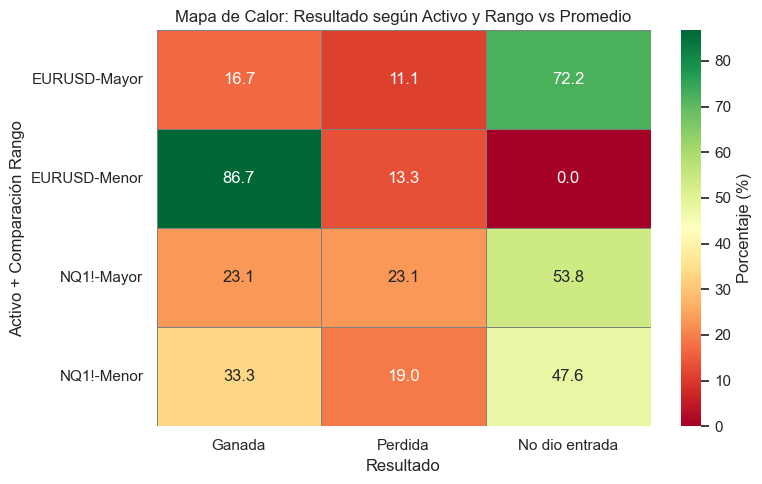

In [35]:
# Crear tabla cruzada de % por activo y comparación
tabla = pd.crosstab(
    index=[df["activo"], df["Rango vs Avg"]],
    columns=df["Resultado"],
    normalize='index'  # % por fila
) * 100

# Reordenar columnas para mantener lógica deseada
tabla = tabla[["Ganada", "Perdida", "No dio entrada"]]

# Colormap personalizado rojo -> naranja -> verde
cmap = sns.color_palette("RdYlGn", as_cmap=True)

# Graficamos
plt.figure(figsize=(8, 5))
sns.heatmap(
    tabla,
    annot=True,
    fmt=".1f",
    cmap=cmap,
    cbar_kws={"label": "Porcentaje (%)"},
    linewidths=0.5,
    linecolor='gray'
)

plt.title("Mapa de Calor: Resultado según Activo y Rango vs Promedio")
plt.xlabel("Resultado")
plt.ylabel("Activo + Comparación Rango")
plt.tight_layout()
plt.show()

## 📌 Conclusiones del análisis general del Rango vs Promedio | Primera Parte

Este análisis buscó determinar si la comparación entre el **rango de la sesión asiática** y el **promedio de los últimos 5 días (AVG)** influye significativamente en el resultado de una operación basada en la estrategia ICT/Smart Money.

### 🎯 Resultados clave:

| Rango vs Promedio | Ganadas | Perdidas | No dio entrada | Total | 
|--------------------|---------|----------|----------------|--------|
| Mayor              | 6       | 5        | 20             | 31     |
| Menor              | 20      | 6        | 10              | 36     |

### 🧠 Interpretación general:

- Cuando el rango es **menor que el promedio**, se observan **más oportunidades válidas y mayor tasa de aciertos** (56% de ganadas).
- Cuando el rango es **mayor**, **la mayoría de los casos terminan en "No dio entrada"** (64%), lo que sugiere menor claridad o estructura desfavorable para la estrategia.

### 🔥 Análisis por activo (mapa de calor):

El mapa de calor comparó la distribución de resultados entre los activos **EUR/USD** y **NQ1!**, separados según si el rango fue mayor o menor al promedio.

- Para **EUR/USD**:
  - Cuando el rango es **menor**, se observó una **altísima probabilidad de éxito (86.7%)** y **ningún caso sin entrada**.
  - Cuando el rango es **mayor**, el 72,2% de las veces **no dio entrada**, y solo el 16,7% fue ganadora.

- Para **NQ1!**:
  - El patrón es **menos marcado**, pero consistente: con rango menor se gana un poco más (33.3% vs. 23.1%) y se reduce la probabilidad de que no haya entrada (47.6% vs. 53,8%).

📌 Esto confirma que **el criterio de “rango menor que el promedio” tiene valor predictivo** y puede ser utilizado como filtro temprano en la toma de decisiones, especialmente con EUR/USD donde el impacto es más fuerte.

---

### ✅ Conclusión operativa:

> **La amplitud del rango respecto al promedio de 5 sesiones es una condición útil para filtrar días operables.**
> 
> Se sugiere priorizar días en los que el rango asiático es inferior al promedio reciente, ya que presentan mejores condiciones para la formación de setups estructurados (reingreso, cambio de estructura, confirmación EMA).

---

### 🛠️ Próximos pasos sugeridos:

- Automatizar esta condición como parte de tu checklist o dashboard diario.
- Evaluar si esta lógica se mantiene al cruzarla con otros filtros (ej. horario de entrada, día de la semana, tipo de activo).
- Evaluar la robustez del criterio de "rango < promedio" como filtro de calidad del día, aplicado individualmente a NQ1! y EUR/USD.


<a id="segunda-parte--análisis-detallado-por-activo-eurusd-y-nq1"></a>
## 2️⃣ Segunda Parte – Análisis Detallado por Activo (EUR/USD y NQ1!)

Este segundo bloque se enfoca en un análisis más profundo y separado por activo. El objetivo es determinar si se puede definir una **zona operativa confiable** a partir del ratio `Rango / AVG`.

### 🔹 Análisis realizado
- Boxplots comparativos por resultado
- Análisis de umbrales (bins) de Rango y AVG
- Gráficos de dispersión
- Análisis del ratio Rango / AVG con cantidad de muestras por bin

In [36]:
# Separar por activo
df_eurusd = df[df["activo"] == "EURUSD"].copy()
df_nq1 = df[df["activo"] == "NQ1!"].copy()

In [37]:
# 2. Estadísticas descriptivas
for nombre, dfa in [("EUR/USD", df_eurusd), ("NQ1!", df_nq1)]:
    print(f"\n\nEstadísticas para {nombre}:")
    stats = dfa.groupby("Resultado", observed=True)[["Rango", "AVG"]].describe()
    if nombre == "EUR/USD":
        display(stats.round(6))
    else:
        display(stats.round(2))



Estadísticas para EUR/USD:


Rango                                                           \
               count      mean      std      min       25%      50%       75%   
Resultado                                                                       
Ganada          16.0  0.001784  0.00082  0.00082  0.001190  0.00169  0.002068   
Perdida          4.0  0.002215  0.00136  0.00132  0.001522  0.00165  0.002342   
No dio entrada  13.0  0.002441  0.00058  0.00171  0.001910  0.00244  0.002600   

                          AVG                                          \
                    max count      mean       std       min       25%   
Resultado                                                               
Ganada          0.00410  16.0  0.002157  0.000605  0.001252  0.001861   
Perdida         0.00424   4.0  0.002031  0.000748  0.001316  0.001574   
No dio entrada  0.00361  13.0  0.001952  0.000463  0.001192  0.001664   

                                              
                     50%       75%       max  
Resultado                                     
Ganada          0.002109  0.002432  0.003224  
Perdida         0.001882  0.002339  0.003044  
No dio entrada  0.001854  0.002302  0.002724



Estadísticas para NQ1!:


Rango                                                      \
               count    mean    std    min    25%    50%     75%     max   
Resultado                                                                  
Ganada          10.0   68.92  25.38  39.00  55.25  64.12   71.81  120.25   
Perdida          7.0   66.46  29.91  29.25  54.50  65.25   67.25  127.25   
No dio entrada  17.0  104.13  88.32  36.50  46.50  68.25  125.00  355.75   

                 AVG                                                     
               count   mean    std    min    25%    50%     75%     max  
Resultado                                                                
Ganada          10.0  78.77  29.84  48.10  54.45  69.82   95.25  139.45  
Perdida          7.0  77.24  24.66  47.55  60.22  71.81   91.30  118.30  
No dio entrada  17.0  87.69  34.92  48.75  65.75  81.45  101.85  175.70

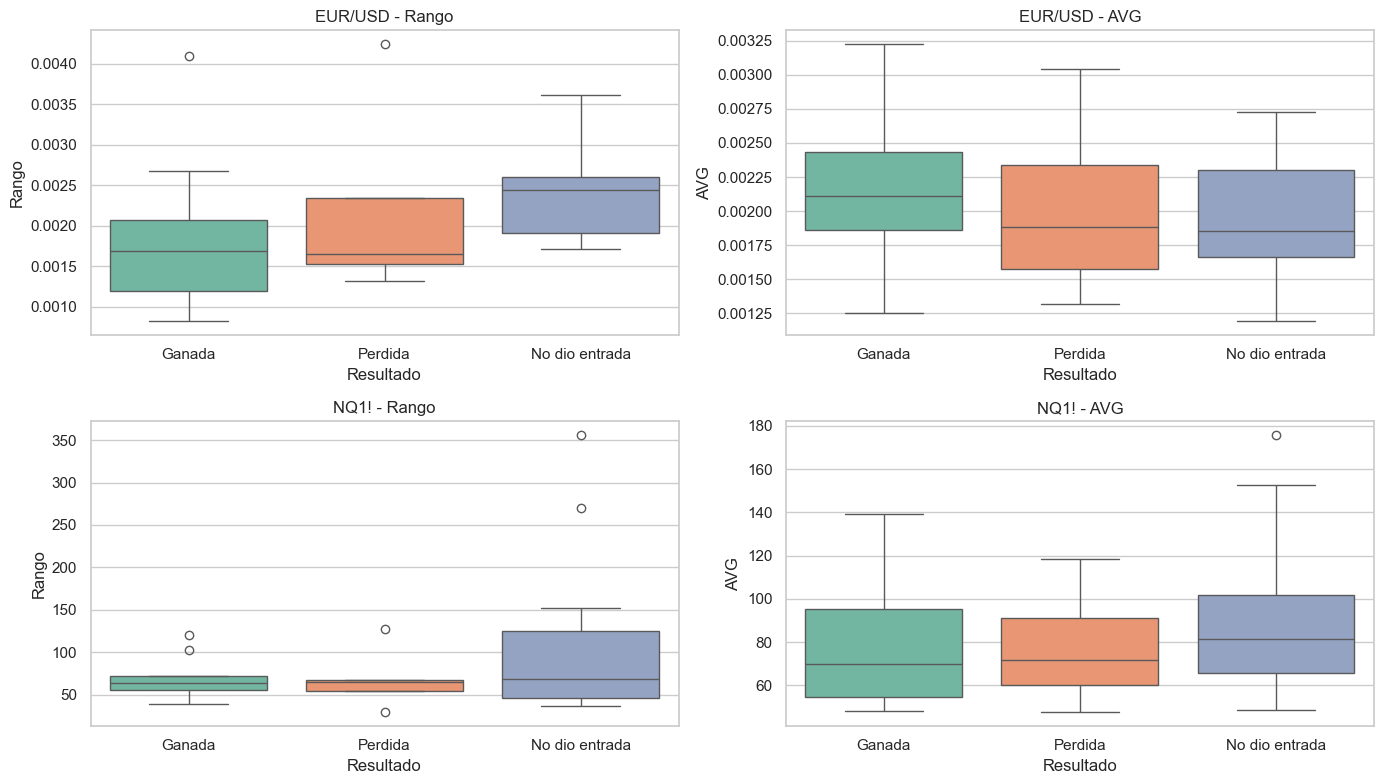

In [38]:
# 3. Boxplots por resultado
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
for i, var in enumerate(["Rango", "AVG"]):
    sns.boxplot(data=df_eurusd, x="Resultado", y=var, ax=axes[0, i], hue="Resultado", palette="Set2", legend=False)
    axes[0, i].set_title(f"EUR/USD - {var}")
    sns.boxplot(data=df_nq1, x="Resultado", y=var, ax=axes[1, i], hue="Resultado", palette="Set2", legend=False)
    axes[1, i].set_title(f"NQ1! - {var}")
plt.tight_layout()
plt.show()

In [39]:
# 2.1 Obtener percentiles para análisis de umbrales
print("\nPercentiles de AVG para definir bins:")
print("EUR/USD:")
percentiles_eurusd = df_eurusd["AVG"].describe(percentiles=[0.25, 0.5, 0.75])
print(percentiles_eurusd)
print("\nNQ1!:")
percentiles_nq1 = df_nq1["AVG"].describe(percentiles=[0.25, 0.5, 0.75])
print(percentiles_nq1)

print("\nPercentiles de Rango para definir bins:")
print("EUR/USD:")
print(df_eurusd["Rango"].describe(percentiles=[0.25, 0.5, 0.75]))
print("\nNQ1!:")
print(df_nq1["Rango"].describe(percentiles=[0.25, 0.5, 0.75]))


Percentiles de AVG para definir bins:
EUR/USD:
count    33.000000
mean      0.002061
std       0.000560
min       0.001192
25%       0.001664
50%       0.001964
75%       0.002358
max       0.003224
Name: AVG, dtype: float64

NQ1!:
count     34.000000
mean      82.912132
std       31.119052
min       47.550000
25%       59.962500
50%       76.175000
75%       97.225000
max      175.700000
Name: AVG, dtype: float64

Percentiles de Rango para definir bins:
EUR/USD:
count    33.000000
mean      0.002095
std       0.000845
min       0.000820
25%       0.001590
50%       0.001910
75%       0.002540
max       0.004240
Name: Rango, dtype: float64

NQ1!:
count     34.000000
mean      86.022059
std       66.774507
min       29.250000
25%       52.875000
50%       64.750000
75%       99.687500
max      355.750000
Name: Rango, dtype: float64


In [40]:
# ------------------------------
# 5. Análisis de umbrales con pd.cut() (valores reales, no en pips)
# ----------------------------------------------------------------------------------
# IMPORTANTE: ¿De dónde salen los valores de los bins usados para agrupar AVG y Rango?
# Los valores NO se tomaron literalmente de los percentiles, sino que fueron redondeados
# hacia arriba con el objetivo de:
# - Hacer más legibles los tramos (por ejemplo: usar 0.0025 en vez de 0.001964)
# - Evitar que un valor quede justo en el borde de un bin (como 0.002001 quedando fuera)
# - Agrupar datos de forma más práctica para análisis visual (gráficos y crosstab)
#
# Por ejemplo, los percentiles de AVG para EUR/USD son:
# min ≈ 0.0012, Q1 ≈ 0.00166, mediana ≈ 0.00196, Q3 ≈ 0.00235, max ≈ 0.00322
# Los bins que se usaron fueron: [0, 0.0015, 0.0020, 0.0025, 0.0030, 0.0040]
# Esto simplifica la lectura y cubre de forma segura todos los valores del dataset.
# Lo mismo aplica a Rango y a los valores de NQ1!
def analizar_umbral(df_activo, nombre_activo):
    if nombre_activo == "EUR/USD":
        # Bins definidos a partir de percentiles observados de AVG y Rango
        bins_avg = [0, 0.0015, 0.0020, 0.0025, 0.0030, 0.0040]
        labels_avg = ["<0.0015", "0.0015–0.0020", "0.0020–0.0025", "0.0025–0.0030", ">0.0030"]

        bins_rango = [0, 0.0012, 0.0016, 0.0020, 0.0025, 0.0040]
        labels_rango = ["<0.0012", "0.0012–0.0016", "0.0016–0.0020", "0.0020–0.0025", ">0.0025"]

    else:  # NQ1!
        bins_avg = [0, 60, 80, 100, 120, 180]
        labels_avg = ["<60", "60–80", "80–100", "100–120", ">120"]

        bins_rango = [0, 55, 70, 90, 110, 200]
        labels_rango = ["<55", "55–70", "70–90", "90–110", ">110"]

    print("\n>> AVG")
    df_activo["AVG_bin"] = pd.cut(df_activo["AVG"], bins=bins_avg, labels=labels_avg)
    tabla_avg = pd.crosstab(df_activo["AVG_bin"], df_activo["Resultado"], normalize="index") * 100
    display(tabla_avg.round(1).astype(str) + "%")

    print("\n>> RANGO")
    df_activo["RANGO_bin"] = pd.cut(df_activo["Rango"], bins=bins_rango, labels=labels_rango)
    tabla_rango = pd.crosstab(df_activo["RANGO_bin"], df_activo["Resultado"], normalize="index") * 100
    display(tabla_rango.round(1).astype(str) + "%")

for nombre, dfa in [("EUR/USD", df_eurusd), ("NQ1!", df_nq1)]:
    print(f"\nAnálisis de umbrales - {nombre}")
    analizar_umbral(dfa, nombre)



Análisis de umbrales - EUR/USD

>> AVG


Resultado,Ganada,Perdida,No dio entrada
AVG_bin,,,
<0.0015,50.0%,16.7%,33.3%
0.0015–0.0020,36.4%,9.1%,54.5%
0.0020–0.0025,60.0%,10.0%,30.0%
0.0025–0.0030,0.0%,0.0%,100.0%
>0.0030,75.0%,25.0%,0.0%



>> RANGO


Resultado,Ganada,Perdida,No dio entrada
RANGO_bin,,,
<0.0012,100.0%,0.0%,0.0%
0.0012–0.0016,60.0%,40.0%,0.0%
0.0016–0.0020,44.4%,11.1%,44.4%
0.0020–0.0025,50.0%,0.0%,50.0%
>0.0025,14.3%,0.0%,85.7%



Análisis de umbrales - NQ1!

>> AVG


Resultado,Ganada,Perdida,No dio entrada
AVG_bin,,,
<60,33.3%,22.2%,44.4%
60–80,37.5%,25.0%,37.5%
80–100,22.2%,22.2%,55.6%
100–120,20.0%,20.0%,60.0%
>120,33.3%,0.0%,66.7%



>> RANGO


Resultado,Ganada,Perdida,No dio entrada
RANGO_bin,,,
<55,27.3%,27.3%,45.5%
55–70,33.3%,25.0%,41.7%
70–90,100.0%,0.0%,0.0%
90–110,33.3%,0.0%,66.7%
>110,20.0%,20.0%,60.0%


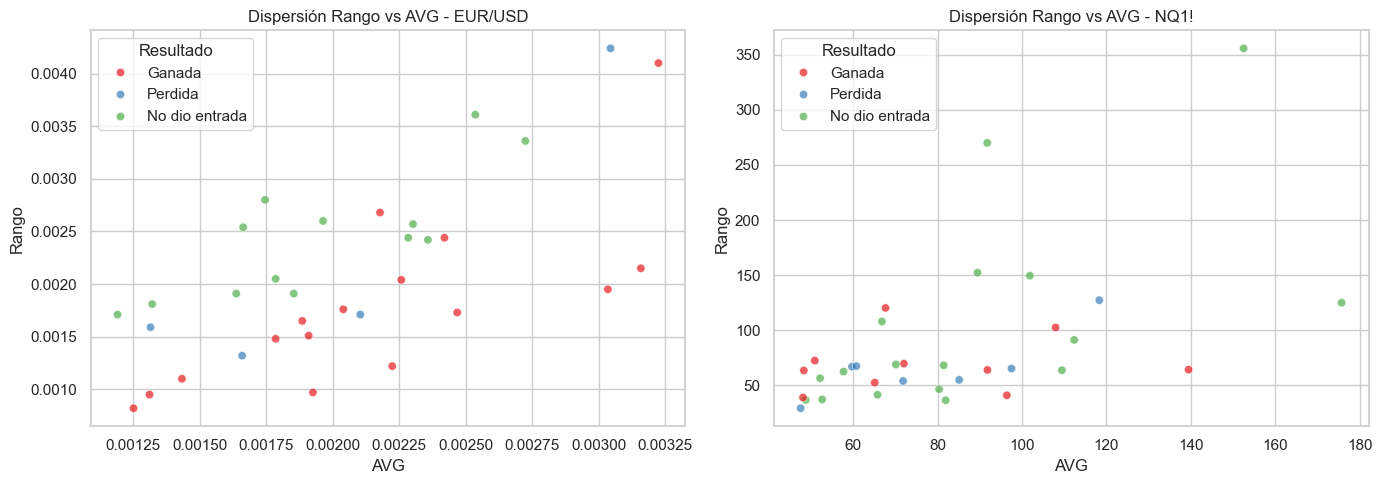

In [41]:
# ------------------------------

# 6. Scatterplot Rango vs AVG por resultado
# Este gráfico muestra cómo se distribuyen los datos en el plano XY:
# - El eje X representa el AVG (promedio del rango de sesiones anteriores)
# - El eje Y representa el Rango del día actual
# - Los puntos están coloreados según el Resultado: Ganada, Perdida o No dio entrada
# Objetivo: observar si los días ganados tienden a concentrarse en ciertas zonas (por ejemplo, valores bajos de AVG y Rango)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(data=df_eurusd, x="AVG", y="Rango", hue="Resultado", alpha=0.7, palette="Set1", ax=axes[0])
axes[0].set_title("Dispersión Rango vs AVG - EUR/USD")
sns.scatterplot(data=df_nq1, x="AVG", y="Rango", hue="Resultado", alpha=0.7, palette="Set1", ax=axes[1])
axes[1].set_title("Dispersión Rango vs AVG - NQ1!")
plt.tight_layout()
plt.show()



In [42]:
# 7. Ratio Rango / AVG y bins de eficiencia
for nombre, dfa in [("EUR/USD", df_eurusd), ("NQ1!", df_nq1)]:
    dfa["Ratio"] = dfa["Rango"] / dfa["AVG"]
    dfa["Ratio_bin"] = pd.cut(dfa["Ratio"], bins=[0, 0.6, 0.8, 1.0, 1.2, 1.5, 2.0, np.inf],
                               labels=["<0.6", "0.6-0.8", "0.8-1.0", "1.0-1.2", "1.2-1.5", "1.5-2.0", ">2.0"])
    
    tabla = pd.crosstab(dfa["Ratio_bin"], dfa["Resultado"], normalize="index") * 100
    tabla_cant = pd.crosstab(dfa["Ratio_bin"], dfa["Resultado"])
    tabla_cant["Total de muestras"] = tabla_cant.sum(axis=1)
    
    # Guardar según el activo
    if nombre == "EUR/USD":
        tabla_eurusd_combinada = pd.concat([tabla.round(1).astype(str) + "%", tabla_cant], axis=1)
    else:
        tabla_nq1_combinada = pd.concat([tabla.round(1).astype(str) + "%", tabla_cant], axis=1)

# Mostrar ambas tablas secuencialmente
print("EUR/USD: Ratio y Cantidades")
display(tabla_eurusd_combinada)

print("\nNQ1!: Ratio y Cantidades")
display(tabla_nq1_combinada)

EUR/USD: Ratio y Cantidades


Resultado,Ganada,Perdida,No dio entrada,Ganada,Perdida,No dio entrada,Total de muestras
Ratio_bin,,,,,,,
<0.6,100.0%,0.0%,0.0%,2,0,0,2
0.6-0.8,87.5%,12.5%,0.0%,7,1,0,8
0.8-1.0,80.0%,20.0%,0.0%,4,1,0,5
1.0-1.2,14.3%,0.0%,85.7%,1,0,6,7
1.2-1.5,22.2%,22.2%,55.6%,2,2,5,9
1.5-2.0,0.0%,0.0%,100.0%,0,0,2,2



NQ1!: Ratio y Cantidades


Resultado,Ganada,Perdida,No dio entrada,Ganada,Perdida,No dio entrada,Total de muestras
Ratio_bin,,,,,,,
<0.6,40.0%,0.0%,60.0%,2,0,3,5
0.6-0.8,11.1%,44.4%,44.4%,1,4,4,9
0.8-1.0,57.1%,0.0%,42.9%,4,0,3,7
1.0-1.2,0.0%,60.0%,40.0%,0,3,2,5
1.2-1.5,66.7%,0.0%,33.3%,2,0,1,3
1.5-2.0,33.3%,0.0%,66.7%,1,0,2,3
>2.0,0.0%,0.0%,100.0%,0,0,2,2


In [43]:
print("Total de datos analizados:", len(df))

Total de datos analizados: 67


In [44]:
print("Total EUR/USD:", len(df_eurusd))
print("Total NQ1!:", len(df_nq1))
print("Total general:", len(df_eurusd) + len(df_nq1))  # debería ser igual a len(df)

Total EUR/USD: 33
Total NQ1!: 34
Total general: 67


## ✅ Conclusión del análisis detallado por activo (EUR/USD y NQ1!) | Segunda Parte

Este estudio evaluó si la relación entre el **rango de la sesión asiática** y el **promedio (AVG) de los últimos días** puede servir como filtro operativo dentro de la estrategia ICT. Se analizaron dos activos: **EUR/USD** y **NQ1!**, considerando diferentes representaciones estadísticas (boxplots, scatter plots, análisis de umbrales y ratio Rango/AVG).

---

### 🧠 Hallazgos clave

#### 📉 1. No existe una “zona operativa óptima” única y clara
- Los resultados no muestran un rango específico de ratio o valor absoluto de Rango/AVG que garantice una alta probabilidad de éxito.
- **No se identifica una franja única que maximice consistentemente las operaciones ganadoras.**
- Sin embargo, ciertos patrones se repiten…

#### ⚠️ 2. Rangos mayores al promedio tienden a ser desfavorables
- Cuando el **Rango es igual o superior al AVG** (ratio > 1), se incrementan los casos de *“No dio entrada”* o *operaciones perdidas*.
- Esto sugiere que un rango excesivamente amplio podría reflejar **estructura ya manipulada**, o sesiones con menos oportunidades claras de entrada.

#### 🟢 3. Rangos por debajo del promedio suelen estar asociados a mayor tasa de éxito
- Ratios entre **0.6 y 1.0** muestran una mayor concentración de operaciones ganadoras, especialmente en **EUR/USD**.
- En esos casos, el mercado aún no presenta movimientos bruscos o expansiones de rango, favoreciendo la lectura estructural y los setups ICT.

#### 🔎 4. Boxplots y dispersión no evidencian valores extremos decisivos
- Los outliers no distorsionan la tendencia general, pero reafirman que la dispersión existe incluso en zonas ganadoras.
- Se requiere un análisis complementario con otras variables como *día de la semana*, *estructura previa*, o *noticias macro*.

---

### 🎯 Conclusión operativa

> **La relación Rango / Promedio (AVG) es útil como filtro general, más no como una regla de entrada exacta.**

Se recomienda:
- Priorizar días en los que el Rango sea **ligeramente inferior al AVG** (ej. ratio entre 0.6 y 1.0).
- **Evitar operar** cuando el Rango es **igual o superior al AVG**, especialmente cuando el ratio supera 1.2, ya que aumentan las operaciones sin entrada o desfavorables.


## ✏️ Conclusión final

> _"Solo se puede concluir que si el rango es mayor, puede haber más chances de que no haya entrada o se pierda la operación y si el rango es menor hay más probabilidad de ganar la entrada."_

Esta observación resume con claridad el aporte del análisis.
No hay un umbral mágico, pero **el comportamiento de los extremos sí aporta claridad** para establecer filtros y evitar días de baja calidad estructural.